In [1]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

In [2]:
DATA_DIR = 'C:/Users/dahyun/Downloads/free-spoken-digit-dataset-master/recordings/'
#DATA_DIR = 'C:/Users/JLK/requirements/recordings/'

In [3]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [4]:
y, sr = librosa.load('0_jackson_0.wav')
y.shape

(14190,)

In [5]:
import sox

ModuleNotFoundError: No module named 'sox'

In [10]:
sr = sox.file_info.sample_rate('0_jackson_0.wav')

NameError: name 'sox' is not defined

In [11]:
librosa.get_samplerate('0_jackson_0.wav')

8000

In [12]:
wav, sr = librosa.load('C:/Users/dahyun/Downloads/free-spoken-digit-dataset-master/recordings/0_jackson_0.wav', sr=None)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/dahyun/Downloads/free-spoken-digit-dataset-master/recordings/0_jackson_0.wav'

In [13]:
sr

22050

In [16]:
wav, sr = librosa.load('C:/Users/dahyun/Downloads/free-spoken-digit-dataset-master/recordings/0_jackson_0.wav', sr=None)
mfcc = librosa.feature.mfcc(wav)

In [17]:
mfcc.shape

(20, 11)

In [18]:
mfcc[1]

array([122.379776 ,  76.30391  ,  32.959167 ,  -2.9676604,   2.931554 ,
        36.501152 ,  55.442417 ,  62.885284 ,  76.6254   , 102.49776  ,
       117.29262  ], dtype=float32)

In [19]:
padded_mfcc = pad2d(mfcc, 40)

NameError: name 'pad2d' is not defined

In [20]:
padded_mfcc.shape

NameError: name 'padded_mfcc' is not defined

In [21]:
padded_mfcc

NameError: name 'padded_mfcc' is not defined

In [22]:
test_speaker = 'theo'
train_X = []
train_spectrograms = []
train_mel_spectrograms = []
train_mfccs = []
train_y = []

test_X = []
test_spectrograms = []
test_mel_spectrograms = []
test_mfccs = []
test_y = []

#a(음성:wave)랑 i를 받아서 a[0:i] 크기만큼을 return 함. (a.shape가 i보다 클 경우.) 아니라면 i의 크기에서 모자란 만큼 0으로 초기화 한 값
pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))
#STFT한 것, CNN분석하기 위해 Spectogram으로 만든 것, MF한 것, mel-spectogram한 것


for fname in os.listdir(DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        struct = fname.split('_')
        digit = struct[0]
        speaker = struct[1]
        wav, sr = librosa.load(DATA_DIR + fname, sr=sr)
        padded_x = pad1d(wav, 30000)
        #librosa.stft(y)를 통해 스펙트럼을 얻는다.
        #
        spectrogram = np.abs(librosa.stft(wav, n_fft=512))
        padded_spectogram = pad2d(spectrogram, 40)
        
        mel_spectogram = librosa.feature.melspectrogram(wav)
        padded_mel_spectrogram = pad2d(mel_spectogram, 40)
        
        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc, 40)
        
        if speaker == test_speaker:
            test_X.append(padded_x)
            test_spectrograms.append(padded_spectogram)
            test_mel_spectrograms.append(padded_mel_spectrogram)
            test_mfccs.append(padded_mfcc)
            test_y.append(digit)
        else:
            train_X.append(padded_x)
            train_spectrograms.append(padded_spectogram)
            train_mel_spectrograms.append(padded_mel_spectrogram)
            train_mfccs.append(padded_mfcc)
            train_y.append(digit)
    except Exception as e:
        print(fname, e)
        raise
        
train_X = np.vstack(train_X)
train_spectrograms = np.array(train_spectrograms)
train_mel_spectrograms = np.array(train_mel_spectrograms)
train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y))

test_X = np.vstack(test_X)
test_spectrograms = np.array(test_spectrograms)
test_mel_spectrograms = np.array(test_mel_spectrograms)
test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))

print('train_X:', train_X.shape)
print('train_spectrograms:', train_spectrograms.shape)
print('train_mel_spectrograms', train_mel_spectrograms.shape)
print('train_mfccs', train_mfccs.shape)
print('train_y', train_y.shape)

print('test_X', test_X.shape)
print('test_spectrograms', test_spectrograms.shape)
print('test_mel_spectrograms', test_mel_spectrograms.shape)
print('test_mfccs', test_mfccs.shape)
print('test_y', test_y.shape)

C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1933
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1399
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1876
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1983
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2033
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2027
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1906
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1900
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2034
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1973
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1790
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1705
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1359
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1673
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1970
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1978
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1965
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2020
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1998
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2044
  warnings.warn(
C:\Users\dahyun\anaconda3\envs\speech\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

train_X: (2500, 30000)
train_spectrograms: (2500, 257, 40)
train_mel_spectrograms (2500, 128, 40)
train_mfccs (2500, 20, 40)
train_y (2500, 10)
test_X (500, 30000)
test_spectrograms (500, 257, 40)
test_mel_spectrograms (500, 128, 40)
test_mfccs (500, 20, 40)
test_y (500, 10)


In [25]:
wav

array([-6.1035156e-05, -2.7465820e-04, -1.5258789e-04, ...,
       -3.0517578e-04,  6.1035156e-05, -1.2207031e-04], dtype=float32)

In [26]:
test_spectrograms[0]

array([[0.0165965 , 0.01481539, 0.01545923, ..., 0.        , 0.        ,
        0.        ],
       [0.0136071 , 0.00355694, 0.00794592, ..., 0.        , 0.        ,
        0.        ],
       [0.01585379, 0.01097529, 0.00500691, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00137991, 0.0024028 , 0.00057527, ..., 0.        , 0.        ,
        0.        ],
       [0.00291335, 0.00348159, 0.00275965, ..., 0.        , 0.        ,
        0.        ],
       [0.00563096, 0.00349552, 0.00112412, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
train_X_ex = np.expand_dims(train_mfccs, -1)
test_X_ex = np.expand_dims(test_mfccs, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train X shape: (2500, 20, 40, 1)
test X shape: (500, 20, 40, 1)


In [28]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(64, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)


m=Flatten()(m)
m=Dense(32, activation='relu')(m)
op=Dense(10, activation='softmax')(m)

model = Model(ip, op)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 40, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 17, 37, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                73760     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 75,178
Trainable params: 75,178
Non-trainable params: 0
__________________________________________________

In [29]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
                    train_y,
                    epochs=100,
                    batch_size=32,
                    verbose=1,
                    validation_data=(test_X_ex, test_y))

Epoch 1/100
79/79 [==============================] - 1s 10ms/step - loss: 4.3385 - accuracy: 0.1436 - val_loss: 3.0503 - val_accuracy: 0.1060
Epoch 2/100
79/79 [==============================] - 1s 7ms/step - loss: 2.2078 - accuracy: 0.2620 - val_loss: 2.3682 - val_accuracy: 0.1740
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 1.8960 - accuracy: 0.3532 - val_loss: 2.1579 - val_accuracy: 0.2560
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 1.6342 - accuracy: 0.4496 - val_loss: 1.9678 - val_accuracy: 0.2440
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 1.3519 - accuracy: 0.5472 - val_loss: 1.6884 - val_accuracy: 0.3800
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 1.1289 - accuracy: 0.6376 - val_loss: 1.5913 - val_accuracy: 0.3980
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.9356 - accuracy: 0.7240 - val_loss: 1.3853 - val_accuracy: 0.4840
Epoch 8/100


Epoch 59/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0186 - accuracy: 0.9992 - val_loss: 0.8139 - val_accuracy: 0.8260
Epoch 60/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0186 - accuracy: 0.9988 - val_loss: 0.8564 - val_accuracy: 0.8180
Epoch 61/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0178 - accuracy: 0.9988 - val_loss: 0.8754 - val_accuracy: 0.8100
Epoch 62/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0172 - accuracy: 0.9984 - val_loss: 0.8645 - val_accuracy: 0.8260
Epoch 63/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0164 - accuracy: 0.9988 - val_loss: 0.8702 - val_accuracy: 0.8260
Epoch 64/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0153 - accuracy: 0.9992 - val_loss: 0.8949 - val_accuracy: 0.8000
Epoch 65/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0157 - accuracy: 0.9988 - val_loss: 0.8865 - val_accuracy: 0.7920
Epoch 

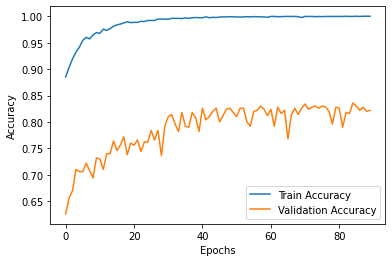

In [30]:
plt.plot(history.history['accuracy'][10:], label='Train Accuracy')
plt.plot(history.history['val_accuracy'][10:], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

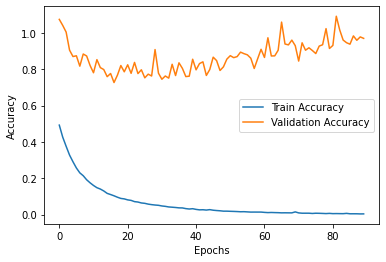

In [31]:
plt.plot(history.history['loss'][10:], label='Train Accuracy')
plt.plot(history.history['val_loss'][10:], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

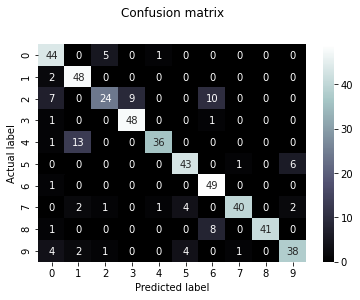

In [33]:
Y_pred = model.predict(test_X_ex)
y_pred = np.argmax(Y_pred,axis=1)

matrix = confusion_matrix(np.argmax(test_y,axis=1), y_pred)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="bone" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()